# NLP in Quality of Life assessment (Data preprocessing)
Samuel de Paúl Smith

### Load necessary libraries:

In [171]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns    

## Exploring and working with labeled testimonies

#### Load data as a DataFrame:

In [172]:
ruta_archivo = 'C:/Users/Samuel/Downloads/Eval_testimonios_Expertos.xlsx'
etiq = pd.read_excel(ruta_archivo)

etiq.columns = ['Enfermedad', 'Persona', 'Testimonio']

In [173]:
ruta_archivo2 = 'C:/Users/Samuel/Downloads/Libro.xlsx'
test_etiq = pd.read_excel(ruta_archivo2)

test_etiq.columns = ['Enfermedad', 'Persona', 'Testimonio']

#### Check for missing values in the imported dataframe due to the excel-python conversion:

<AxesSubplot:>

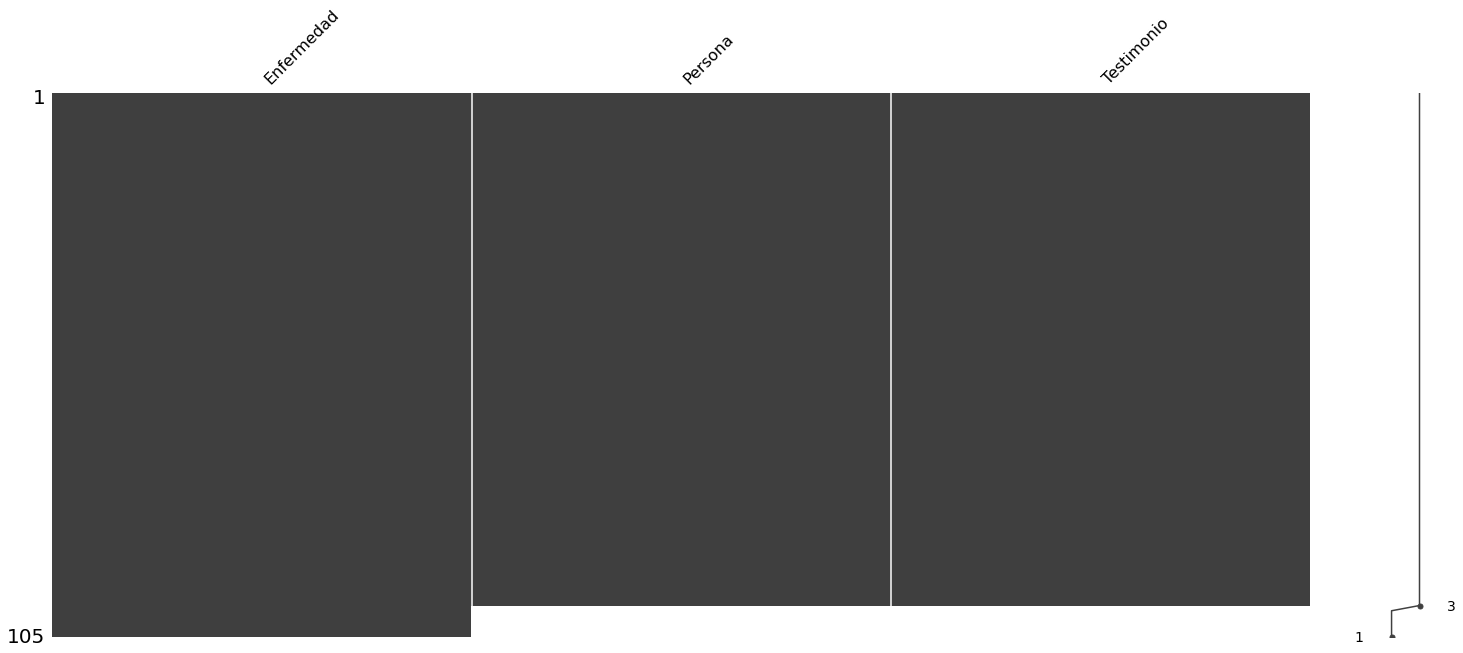

In [250]:
import missingno as msno
msno.matrix(etiq2)

<AxesSubplot:>

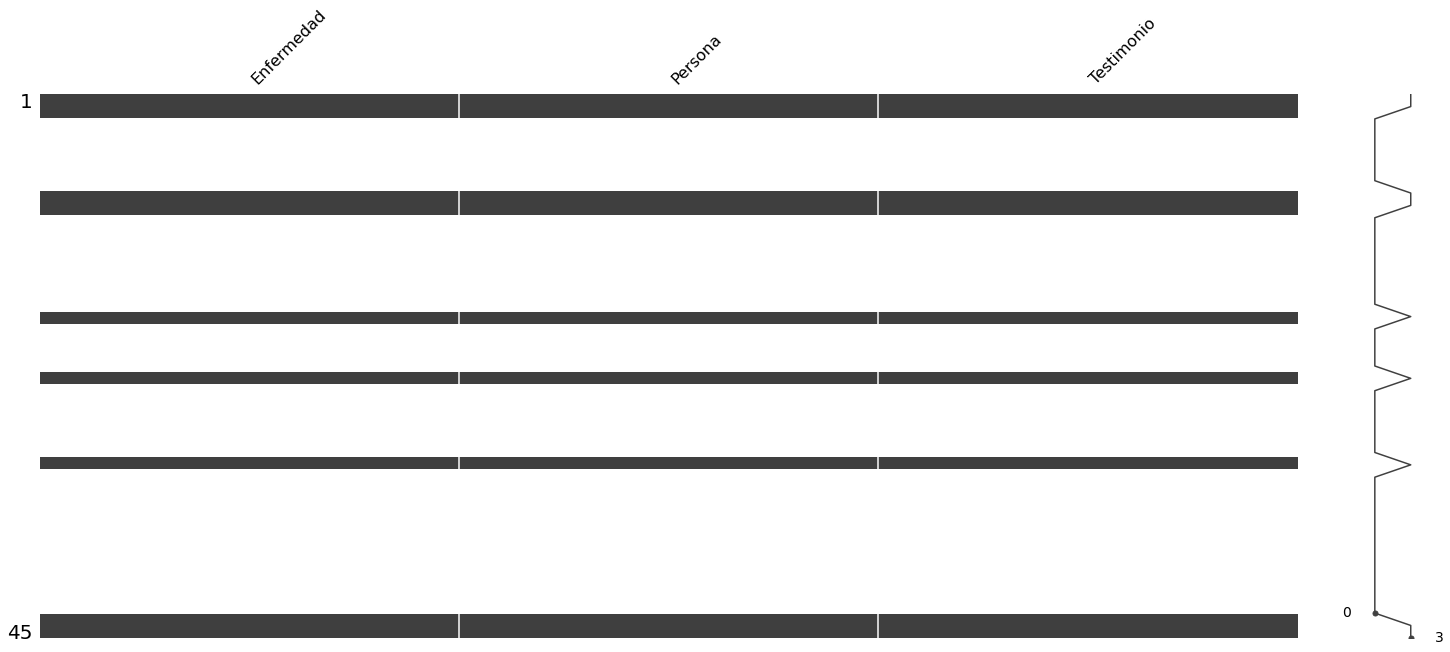

In [251]:
import missingno as msno
msno.matrix(test_etiq2)

#### Discarding observations containing missing values

In [252]:
etiq2 = etiq2.dropna()

In [253]:
test_etiq2 = test_etiq2.dropna()

#### Keep only the labelled testimonies:

In [256]:
etiq2 = etiq2[etiq2['Testimonio'].str.contains(']')].copy()

In [257]:
test_etiq2 = test_etiq2[test_etiq2['Testimonio'].str.contains(']')].copy()

#### Partition testimonies into sentences:

In [262]:
# Function that separates a labeled testimony in sentences
def separar_en_frases(texto):
    frases_obtenidas = re.split(r'(?<=[\.\]])', texto)
    frases_obtenidas = [frase.strip() for frase in frases_obtenidas if frase.strip()]
    return frases_obtenidas

# Apply the function to the 'Tesimonio' column and save the result in a new column 'lista_frases'
etiq2['lista_frases'] = etiq2['Testimonio'].apply(separar_en_frases)
test_etiq2['lista_frases'] = test_etiq2['Testimonio'].apply(separar_en_frases)

In [263]:
etiq2.lista_frases[0]

['"Siempre me ha interesado cómo funciona el cerebro.',
 'Me hice profesor de neurofisiología clínica y trabajé con personas que viven con epilepsia.',
 'Después, tras sufrir un accidente de ciclismo a los 61 años, pasé a padecer yo mismo esta enfermedad.',
 'Fui operado por los hematomas subdurales que tenía en el cerebro y posteriormente desarrollé epilepsia.',
 'Tras estudiar la epilepsia durante décadas, me resultó difícil asumir el hecho [Falta de aceptación -]',
 'de que ahora yo era un paciente y no el médico [cambio de rol social =]',
 '.',
 'He evolucionado para entender de una forma mucho más exhaustiva de qué modo afecta la incertidumbre [adaptación+, empatía+, incertidumbre -]',
 'de la epilepsia a las personas.',
 'Comparto mi experiencia [dar apoyo social+]',
 ',\xa0 y fomento la percepción de llevar una buena vida conviviendo con la epilepsia [reevaluación positiva+]',
 '.',
 '"']

#### Unwind the testimonies by sentences, enlarging the dataframe:

In [264]:
etiq2_unwind = etiq2.explode('lista_frases').reset_index(drop=True).drop(["Testimonio"], axis = 1)
test_etiq2_unwind = test_etiq2.explode('lista_frases').reset_index(drop=True).drop(["Testimonio"], axis = 1)

In [265]:
etiq2_unwind.head()

,Enfermedad,Persona,lista_frases
0,Epilepsia,Primera Persona,"""Siempre me ha interesado cómo funciona el cer..."
1,Epilepsia,Primera Persona,Me hice profesor de neurofisiología clínica y ...
2,Epilepsia,Primera Persona,"Después, tras sufrir un accidente de ciclismo ..."
3,Epilepsia,Primera Persona,Fui operado por los hematomas subdurales que t...
4,Epilepsia,Primera Persona,"Tras estudiar la epilepsia durante décadas, me..."


In [266]:
test_etiq2_unwind.head()

,Enfermedad,Persona,lista_frases
0,Cáncer,Primera Persona,"""no es algo que ni una madre ni una esposa y u..."
1,Cáncer,Primera Persona,así a darle apoyo a uno a la otra persona para...
2,Cáncer,Primera Persona,y no caer [espíritu de lucha]
3,Cáncer,Primera Persona,porque es que el cáncer hoy en día es un una c...
4,Cáncer,Primera Persona,adelante y tener una vida yo en los diez años ...


#### Extracting labels from the data:
Since the labels are integrated in the text we will have to extract them. In the following code chunk we define a function that extracts indicators and stores them in a new variable of the data frame.

In [269]:
import re
import itertools

etiq2_unwind['lista_frases'] = etiq2_unwind['lista_frases'].astype(str)
test_etiq2_unwind['lista_frases'] = test_etiq2_unwind['lista_frases'].astype(str)

# Funcction that extracts terms between brackets from a text
def extraer_terminos(texto):
    patron = r'\[([^\]]+)\]'  # Regular expression to search for terms between brackets
    matches = re.findall(patron, texto) 
    matches = [re.split(r',|;',elemento) for elemento in matches]
    matches = list(itertools.chain.from_iterable(matches))
    return matches

# Apply the function to the 'lista_frases' column and save the result in a new column 'indicadores'
etiq2_unwind['indicadores'] = etiq2_unwind['lista_frases'].apply(extraer_terminos)
test_etiq2_unwind['indicadores'] = test_etiq2_unwind['lista_frases'].apply(extraer_terminos)

In [270]:
etiq2_unwind['cant_ind'] = etiq2_unwind['indicadores'].apply(lambda x: len(x))
test_etiq2_unwind['cant_ind'] = test_etiq2_unwind['indicadores'].apply(lambda x: len(x))

In [271]:
etiq2_unwind.head(15)

,Enfermedad,Persona,lista_frases,indicadores,cant_ind
0,Epilepsia,Primera Persona,"""Siempre me ha interesado cómo funciona el cer...",[],0
1,Epilepsia,Primera Persona,Me hice profesor de neurofisiología clínica y ...,[],0
2,Epilepsia,Primera Persona,"Después, tras sufrir un accidente de ciclismo ...",[],0
3,Epilepsia,Primera Persona,Fui operado por los hematomas subdurales que t...,[],0
4,Epilepsia,Primera Persona,"Tras estudiar la epilepsia durante décadas, me...",[Falta de aceptación -],1
5,Epilepsia,Primera Persona,de que ahora yo era un paciente y no el médico...,[cambio de rol social =],1
6,Epilepsia,Primera Persona,.,[],0
7,Epilepsia,Primera Persona,He evolucionado para entender de una forma muc...,"[adaptación+, empatía+, incertidumbre -]",3
8,Epilepsia,Primera Persona,de la epilepsia a las personas.,[],0
9,Epilepsia,Primera Persona,Comparto mi experiencia [dar apoyo social+],[dar apoyo social+],1


In [272]:
test_etiq2_unwind.head(15)

,Enfermedad,Persona,lista_frases,indicadores,cant_ind
0,Cáncer,Primera Persona,"""no es algo que ni una madre ni una esposa y u...",[fortaleza],1
1,Cáncer,Primera Persona,así a darle apoyo a uno a la otra persona para...,[búsqueda de apoyo social emocional],1
2,Cáncer,Primera Persona,y no caer [espíritu de lucha],[espíritu de lucha],1
3,Cáncer,Primera Persona,porque es que el cáncer hoy en día es un una c...,[esperanza],1
4,Cáncer,Primera Persona,adelante y tener una vida yo en los diez años ...,[impacto en el ámbito laboral],1
5,Cáncer,Primera Persona,porque acá tengo un poco problemas de balance ...,[problemas de movilidad],1
6,Cáncer,Primera Persona,por ello nunca deje de trabajar yo siempre est...,[adherencia al tratamiento],1
7,Cáncer,Primera Persona,y al siguiente día iba a trabajar y ese es mi ...,[espíritu de lucha],1
8,Cáncer,Primera Persona,"""",[],0
9,Cáncer,Primera Persona,"“Hola, me llamo Marta y tengo 16 años.",[],0


We see that some sentences contain indicators and some don't.

### Process indicators:

We process the indicators since many of them are the same just expressed using different words or adding some stopwords.

#### Elimination of stopwords:

In [276]:
import nltk
from nltk.corpus import stopwords

# Download and load a list of Spanish stopwords
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

# Define a function to process indicators
def procesar_indicadores(indicadores):
    indicadores_procesados = []
    for indicador in indicadores:
        ultimo_caracter = indicador[-1]
        if not ultimo_caracter.isalpha():
            indicador = indicador[:-1]
        indicador = indicador.strip().lower()
        indicador = ' '.join([palabra for palabra in indicador.split() if palabra not in stopwords_es])
        indicadores_procesados.append(indicador)
    return indicadores_procesados

# Apply stopword elimination to the column "indicadores"
etiq2_unwind['indicadores_procesados'] = etiq2_unwind['indicadores'].apply(procesar_indicadores)
test_etiq2_unwind['indicadores_procesados'] = test_etiq2_unwind['indicadores'].apply(procesar_indicadores)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [277]:
etiq2_unwind = etiq2_unwind.drop(["indicadores"], axis = 1)
test_etiq2_unwind = test_etiq2_unwind.drop(["indicadores"], axis = 1)

In [278]:
etiq2_unwind.head(15)

,Enfermedad,Persona,lista_frases,cant_ind,indicadores_procesados
0,Epilepsia,Primera Persona,"""Siempre me ha interesado cómo funciona el cer...",0,[]
1,Epilepsia,Primera Persona,Me hice profesor de neurofisiología clínica y ...,0,[]
2,Epilepsia,Primera Persona,"Después, tras sufrir un accidente de ciclismo ...",0,[]
3,Epilepsia,Primera Persona,Fui operado por los hematomas subdurales que t...,0,[]
4,Epilepsia,Primera Persona,"Tras estudiar la epilepsia durante décadas, me...",1,[falta aceptación]
5,Epilepsia,Primera Persona,de que ahora yo era un paciente y no el médico...,1,[cambio rol social]
6,Epilepsia,Primera Persona,.,0,[]
7,Epilepsia,Primera Persona,He evolucionado para entender de una forma muc...,3,"[adaptación, empatía, incertidumbre]"
8,Epilepsia,Primera Persona,de la epilepsia a las personas.,0,[]
9,Epilepsia,Primera Persona,Comparto mi experiencia [dar apoyo social+],1,[dar apoyo social]


In [279]:
test_etiq2_unwind.head(15)

,Enfermedad,Persona,lista_frases,cant_ind,indicadores_procesados
0,Cáncer,Primera Persona,"""no es algo que ni una madre ni una esposa y u...",1,[fortaleza]
1,Cáncer,Primera Persona,así a darle apoyo a uno a la otra persona para...,1,[búsqueda apoyo social emocional]
2,Cáncer,Primera Persona,y no caer [espíritu de lucha],1,[espíritu lucha]
3,Cáncer,Primera Persona,porque es que el cáncer hoy en día es un una c...,1,[esperanza]
4,Cáncer,Primera Persona,adelante y tener una vida yo en los diez años ...,1,[impacto ámbito laboral]
5,Cáncer,Primera Persona,porque acá tengo un poco problemas de balance ...,1,[problemas movilidad]
6,Cáncer,Primera Persona,por ello nunca deje de trabajar yo siempre est...,1,[adherencia tratamiento]
7,Cáncer,Primera Persona,y al siguiente día iba a trabajar y ese es mi ...,1,[espíritu lucha]
8,Cáncer,Primera Persona,"""",0,[]
9,Cáncer,Primera Persona,"“Hola, me llamo Marta y tengo 16 años.",0,[]


In [281]:
etiq2_unwind = etiq2_unwind.explode('indicadores_procesados').reset_index(drop=True)
test_etiq2_unwind = test_etiq2_unwind.explode('indicadores_procesados').reset_index(drop=True)

In [282]:
etiq2_unwind = etiq2_unwind[etiq2_unwind['lista_frases'].str.contains('[a-zA-Z]', regex=True)].copy()
test_etiq2_unwind = test_etiq2_unwind[test_etiq2_unwind['lista_frases'].str.contains('[a-zA-Z]', regex=True)].copy()

### Process the sentences:

In [283]:
# Clean the texts in the column 'lista_frases'
etiq2_unwind['lista_frases'] = etiq2_unwind['lista_frases'].str.replace(r'\[.*?\]', '', regex=True)
etiq2_unwind['lista_frases'] = etiq2_unwind['lista_frases'].str.replace('-', '')

# Remove additional blank spaces
etiq2_unwind['lista_frases'] = etiq2_unwind['lista_frases'].str.strip()

# Remove double quotation marks
etiq2_unwind['lista_frases'] = etiq2_unwind['lista_frases'].str.replace('"', '')

In [284]:
# Clean the texts in the column 'lista_frases'
test_etiq2_unwind['lista_frases'] = test_etiq2_unwind['lista_frases'].str.replace(r'\[.*?\]', '', regex=True)
test_etiq2_unwind['lista_frases'] = test_etiq2_unwind['lista_frases'].str.replace('-', '')

# Remove additional blank spaces
test_etiq2_unwind['lista_frases'] = test_etiq2_unwind['lista_frases'].str.strip()

# Remove double quotation marks
test_etiq2_unwind['lista_frases'] = test_etiq2_unwind['lista_frases'].str.replace('"', '')

In [285]:
etiq2_unwind.head(7)

,Enfermedad,Persona,lista_frases,cant_ind,indicadores_procesados
0,Epilepsia,Primera Persona,Siempre me ha interesado cómo funciona el cere...,0,NaN
1,Epilepsia,Primera Persona,Me hice profesor de neurofisiología clínica y ...,0,NaN
2,Epilepsia,Primera Persona,"Después, tras sufrir un accidente de ciclismo ...",0,NaN
3,Epilepsia,Primera Persona,Fui operado por los hematomas subdurales que t...,0,NaN
4,Epilepsia,Primera Persona,"Tras estudiar la epilepsia durante décadas, me...",1,falta aceptación
5,Epilepsia,Primera Persona,de que ahora yo era un paciente y no el médico,1,cambio rol social
7,Epilepsia,Primera Persona,He evolucionado para entender de una forma muc...,3,adaptación


In [286]:
test_etiq2_unwind.head(7)

,Enfermedad,Persona,lista_frases,cant_ind,indicadores_procesados
0,Cáncer,Primera Persona,no es algo que ni una madre ni una esposa y un...,1,fortaleza
1,Cáncer,Primera Persona,así a darle apoyo a uno a la otra persona para...,1,búsqueda apoyo social emocional
2,Cáncer,Primera Persona,y no caer,1,espíritu lucha
3,Cáncer,Primera Persona,porque es que el cáncer hoy en día es un una c...,1,esperanza
4,Cáncer,Primera Persona,adelante y tener una vida yo en los diez años ...,1,impacto ámbito laboral
5,Cáncer,Primera Persona,porque acá tengo un poco problemas de balance,1,problemas movilidad
6,Cáncer,Primera Persona,por ello nunca deje de trabajar yo siempre est...,1,adherencia tratamiento


### Assign indicators to the dimensions of SF-36 Quality of Life evaluation questionnaire:

In [287]:
# Create a list of dimensions using the values from 'indicadores_procesados' as keys of the dictionary
dimensiones = [asociacion_indicadores.get(indicador) for indicador in etiq2_unwind.indicadores_procesados]
dimensiones_test = [asociacion_indicadores.get(indicador) for indicador in test_etiq2_unwind.indicadores_procesados]

In [288]:
# Add the "dimensiones" column to the etiq2_unwind df
etiq2_unwind['dimensiones'] = dimensiones
test_etiq2_unwind['dimensiones'] = dimensiones_test

### Mark if each sentence contains or not a QoL indicator:

In [289]:
# Create the column 'ind_bool' with default values of 0
etiq2_unwind['ind_bool'] = 0
test_etiq2_unwind['ind_bool'] = 0

# Assign 1 to the non-null elements in the column 'indicadores_procesados'
etiq2_unwind.loc[~etiq2_unwind['indicadores_procesados'].isnull(), 'ind_bool'] = 1
test_etiq2_unwind.loc[~test_etiq2_unwind['indicadores_procesados'].isnull(), 'ind_bool'] = 1

We have a look at the percentage of sentences that contain indicators:

In [290]:
print("Un {}% de las frases contienen un indicador en el conjunto de train/val".format(round((sum(etiq2_unwind.ind_bool)/len(etiq2_unwind.ind_bool))*100)))

Un 64% de las frases contienen un indicador en el conjunto de train/val


In [291]:
print("Un {}% de las frases contienen un indicador en el conjunto de test".format(round((sum(test_etiq2_unwind.ind_bool)/len(test_etiq2_unwind.ind_bool))*100)))

Un 75% de las frases contienen un indicador en el conjunto de test


#### Rename df columns for clearer interpretation:

In [292]:
etiq2_unwind = etiq2_unwind.rename(columns={'lista_frases': 'frase', 'cant_ind':'num_ind', 'indicadores_procesados':'indicador', 'dimensiones':'dimension', 'ind_bool': 'contiene_indicador'})
test_etiq2_unwind = test_etiq2_unwind.rename(columns={'lista_frases': 'frase', 'cant_ind':'num_ind', 'indicadores_procesados':'indicador', 'dimensiones':'dimension', 'ind_bool': 'contiene_indicador'})

In [293]:
data = etiq2_unwind
test_data = test_etiq2_unwind

## Final processed Datasets:

In [296]:
pd.set_option('display.max_rows', None)

In [295]:
data.head(10)

,Enfermedad,Persona,frase,num_ind,indicador,dimension,contiene_indicador
0,Epilepsia,Primera Persona,Siempre me ha interesado cómo funciona el cere...,0,NaN,None,0
1,Epilepsia,Primera Persona,Me hice profesor de neurofisiología clínica y ...,0,NaN,None,0
2,Epilepsia,Primera Persona,"Después, tras sufrir un accidente de ciclismo ...",0,NaN,None,0
3,Epilepsia,Primera Persona,Fui operado por los hematomas subdurales que t...,0,NaN,None,0
4,Epilepsia,Primera Persona,"Tras estudiar la epilepsia durante décadas, me...",1,falta aceptación,Dimension 8: Mental Health,1
5,Epilepsia,Primera Persona,de que ahora yo era un paciente y no el médico,1,cambio rol social,Dimension 7: Role Limitations due to Emotional...,1
7,Epilepsia,Primera Persona,He evolucionado para entender de una forma muc...,3,adaptación,Dimension 7: Role Limitations due to Emotional...,1
8,Epilepsia,Primera Persona,He evolucionado para entender de una forma muc...,3,empatía,Dimension 8: Mental Health,1
9,Epilepsia,Primera Persona,He evolucionado para entender de una forma muc...,3,incertidumbre,Dimension 8: Mental Health,1
10,Epilepsia,Primera Persona,de la epilepsia a las personas.,0,NaN,None,0


In [297]:
test_data.head(20)

,Enfermedad,Persona,frase,num_ind,indicador,dimension,contiene_indicador
0,Cáncer,Primera Persona,no es algo que ni una madre ni una esposa y un...,1,fortaleza,Dimension 5: Vitality,1
1,Cáncer,Primera Persona,así a darle apoyo a uno a la otra persona para...,1,búsqueda apoyo social emocional,Dimension 6: Social Functioning,1
2,Cáncer,Primera Persona,y no caer,1,espíritu lucha,Dimension 5: Vitality,1
3,Cáncer,Primera Persona,porque es que el cáncer hoy en día es un una c...,1,esperanza,Dimension 5: Vitality,1
4,Cáncer,Primera Persona,adelante y tener una vida yo en los diez años ...,1,impacto ámbito laboral,Dimension 2: Role Limitations due to Physical ...,1
5,Cáncer,Primera Persona,porque acá tengo un poco problemas de balance,1,problemas movilidad,Dimension 2: Role Limitations due to Physical ...,1
6,Cáncer,Primera Persona,por ello nunca deje de trabajar yo siempre est...,1,adherencia tratamiento,Dimension 9: Healthcare Interaction,1
7,Cáncer,Primera Persona,y al siguiente día iba a trabajar y ese es mi ...,1,espíritu lucha,Dimension 5: Vitality,1
9,Cáncer,Primera Persona,"“Hola, me llamo Marta y tengo 16 años.",0,NaN,None,0
10,Cáncer,Primera Persona,Hace 10 años me diagnosticaron un tumor en mi ...,1,confirmación diagnóstico,Dimension 9: Healthcare Interaction,1


#### Saved processed datasets as .csv files:

In [298]:
data.to_csv('frases.csv', index=False)
test_data.to_csv('frases_test.csv', index = False)

## Testimony Exploratory Data Analysis:

#### Train-val-test division:

In [299]:
data.shape[0]*0.8

728.0

In [300]:
data.shape[0]*0.2

182.0

In [301]:
test_data.shape[0]

104

The division is therefore: 72%-18%-10%

#### Plot a pie chart showing indicator distribution by dimensions of the SF-36 questionnaire.

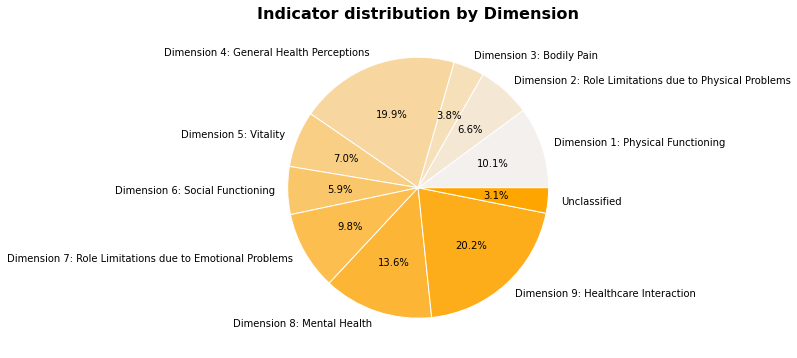

In [312]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

indicadores = list(asociacion_indicadores.keys())
dimensiones = list(asociacion_indicadores.values())

plt.figure(figsize=(8, 6))
plt.pie([dimensiones.count(dim) for dim in sorted(set(dimensiones))],
        labels=sorted(set(dimensiones)),
        autopct='%1.1f%%',
        colors=sns.light_palette("orange", len(set(dimensiones))),
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.title("Indicator distribution by Dimension", fontsize=16, fontweight='bold')
plt.show()



In [303]:
print("En el conjunto de testimonios se han identificado {} indicadores de calidad de vida diferentes".format(sum(valores)))

En el conjunto de testimonios se han identificado 287 indicadores de calidad de vida diferentes


#### Plot a horizontal bar chart showing the each dimension's ocurrencies

In [304]:
joint_df = pd.concat([data, test_data], axis = 0)

In [306]:
lista_dims = joint_df[[not elemento for elemento in joint_df["indicador"].isnull()]]["dimension"]

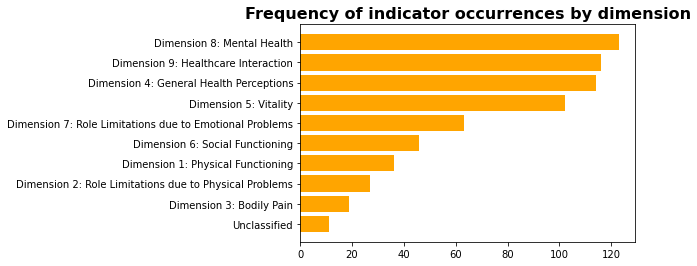

In [315]:
import matplotlib.pyplot as plt

# Create a dictionary to store the number of occurrences of each element
ocurrencias = {}

# Calculate the number of occurrences of each element in the list
for elemento in lista_dims:
    ocurrencias[elemento] = ocurrencias.get(elemento, 0) + 1

# Get the categories and the frequencies ordered in descending order
etiquetas = sorted(ocurrencias.keys(), key=lambda x: ocurrencias[x], reverse=False)
valores = [ocurrencias[etiqueta] for etiqueta in etiquetas]

# Create horizontal barplot
plt.barh(etiquetas, valores, color="orange")
plt.title("Frequency of indicator occurrences by dimension", fontsize=16, fontweight='bold')
plt.show()

